__Assignment 1__  
__Name: Gideon Francis__  
__Student ID: 2301207__

# CSD3185/CSD3186: Assignment 1

## Topics Covered
- Linear Regression
- Gradient Descent Algorithm
- Mean Squared Error (MSE)


## Objectives

1. Apply gradient descent algorithm to predict the housing prices in Boston city.  
2. Get familiarized on determining values of hyperparameters and evaluating the performance of a machine learning algorithm.

## Dataset


The Boston Housing dataset (Boston_housing_price.csv) contains information about housing in the Boston area. There are 506 instances and 13 attributes (all numeric). The target variable (`MEDV`) is the median value of owner-occupied homes in thousands of dollars.

You can also refer to [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) for more details.

## Deliverables

Your submission for this assignment should be only __ONE__ file - this particular completed notebook file. 

Also, *RENAME* your file like this: __\<coursecode\>\_<assignment#>\_<your_full_name>.ipynb__  
Eg. CS3185_A1_John_Doe.ipynb  

To complete this assignment, you should follow instructions in below section Tasks.

## IMPORTANT! READ THIS BEFORE STARTING...
- DO NOT delete existing cells, but you can add more cells anywhere in the notebook as necessary.
- DO NOT modify the content of the existing cells unless otherwise stated (e.g., for code implementation). However, DO NOT change the variable names that are already defined in the existing cells.
- Follow the file naming convention for the notebook file as spelled out above strictly.

Please adhere strictly to the instructions as stated above as failure to do so might result in deduction of marks by the autograder.

Your assignment begins after the line below!! Complete all the tasks as specified.

---

### Part 1 Load libraries and dataset

Load only `pandas`, `numpy` and `matplotlib` libraries for this assignment. No additional libraries are allowed for this assignment. 

In [1]:
# DO NOT modify this cell.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the dataset 'Boston_housing_price.csv' into a pandas DataFrame named `df`.

In [2]:
# DO NOT modify the code below (ensure dataset in same folder as this notebook)
df = pd.read_csv('Boston_housing_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Part 2 Prepare train and test set


 __Task 1__     
Split your data into features and target variable. The target variable is `MEDV`.


In [3]:
# Separate features (X) and target (y)
# Replace ... with your code
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [4]:
print(len(X))
print (len(y))
print (X.shape[0])

506
506
506


 __Task 2__  
 Split your data into train and test set with train set holding 404 rows and test set with 102 rows.

In [5]:
# Split dataset into Train (404 rows) and Test (102 rows) sets
# Replace ... with your code
X_train = X[:404]
y_train = y[:404]
X_test = X[404:]
y_test = y[404:]

### Part 3 Preprocessing

__Task 3__    
Create a function `z_score_norm` that uses Z-score normalization for features scaling.  
Use numpy vectorization operation instead of using `for` loop to complete the task.

In [6]:
def z_score_norm(X) :
    """
    Normalize dataset using Z-Score normalization.
    Inputs: X - numpy.ndarray, the dataset for normalization
    Outputs: (X_norm, (mean, std)) - tuple, the normalized dataset and mean/std for each feature
    """
    # replace ... with your code
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, (mean, std)

In [7]:
# Normalize training data
X_train_norm, z_score_vals = z_score_norm(X_train)

### Part 4 Creating functions for Linear Regression model

#### Mean Squared Error (MSE) function

__Task 4__    
Create a function to calculate the Mean Squared Error (MSE) for multiple features. The function should take the input features, target values, bias, and weights as inputs, and return the MSE as float.  
*Note: This function will be used in the `train` function later.*  
*Note: Use numpy vectorization method instead of for loop.*

In [8]:
# Mean Squared Error
def loss_MSE(X, Y, b, W) -> float:
    """
    Generalized MSE calculation for multiple features.
    Inputs: X - numpy.ndarray, the input feature values
            Y - numpy.ndarray, the true output values
            b - float/int, bias
            W - numpy.ndarray, weights for features
    Outputs: MSE - float
    """
    # replace ... with your code
    predictedVal = np.dot(X,W) + b
    squaredError = (Y - predictedVal) * (Y - predictedVal)
    MSE = np.mean(squaredError)
    return float(MSE)

#### Bias and weight computation function

__Task 5__  
Create a function to update the bias and weights. The function should return the updated bias and weights as a tuple.  
*Note: This function will be used in the `train` function later.*  
*Note: Use numpy vectorization method instead of for loop.*

In [9]:
# Update Bias and Weights
def update_bias_weights(X, Y, b, W, learning_rate):
    """
    Update bias and weights for multiple features using Gradient Descent.
    Inputs: X - numpy.ndarray, the input feature values
            Y - numpy.ndarray, the true output values
            b - float/int, bias
            W - numpy.ndarray, weights for features
            learning_rate - float, the learning rate
    Outputs: (b, W) - tuple, the updated bias and weights
    """
    # replace ... with your code
    predicted_Val = np.dot(X,W) + b
    error = Y - predicted_Val
    weight_Deriv = -2 * np.dot(X.T, error) / X.shape[0]
    bias_Deriv = -2 * np.mean(error)
    b = b - (bias_Deriv * learning_rate)
    W = W - (weight_Deriv * learning_rate)
    
    return b, W

In [10]:
initial_b = 0
initial_W = np.zeros((X_train.shape[1]))
learning_rate = 0.001

b, W = update_bias_weights(X_train_norm, y_train, initial_b, initial_W, learning_rate)
print(b)
print(W)

0.04835148514851485
[-0.00551586  0.00579589 -0.0071711   0.0026266  -0.00591922  0.01382503
 -0.0054096   0.00236591 -0.00424372 -0.00626181 -0.00820623  0.00256138
 -0.01310832]


#### The training and optimal learning rate function

__Task 6__    
For this task, you are required to create two functions as detailed below and will be evaluated together by producing the MSE for the best learning rate.

Create a function to train the model. The function will iterate over the training data for a specified number of iterations, updating the bias and weights at each step. The function will return the loss history and the final bias and weights.  
*Note: The loss history is a list of the mean squared error (MSE) after each iteration.*  
*Note: The function will utilize the `loss_MSE` and `update_bias_weights` function.*

In [11]:
# Train Model
def train(X, Y, b, W, learning_rate, learning_iterations):
    """
    Train a linear regression model for multiple features.
    Inputs: X - numpy.ndarray, the input feature values
            Y - numpy.ndarray, the true output values
            b - float/int, bias
            W - numpy.ndarray, weights for features
            learning_rate - float, the learning rate
            learning_iterations - int, the number of training iterations
    Outputs: (loss_history, b, W) - tuple, the loss history and the final bias and weights
    """
    # replace ... with your code
    loss_history = []
    for i in range(learning_iterations):
        b, W = update_bias_weights(X, Y, b, W, learning_rate)
        loss = loss_MSE(X, Y, b, W)
        loss_history.append(loss)
        
    return loss_history, b, W

In [12]:
# Select optimal learning rate
def optimal_learning_rate(X, Y, b, W, learning_rates, learning_iterations):
    """
    Select the best learning rate based on the final MSE.
    Inputs:
        X - numpy.ndarray, the input feature values
        Y - numpy.ndarray, the true output values
        b - float/int, initial bias
        W - numpy.ndarray, initial weights for features
        learning_rates - list, a list of learning rates to evaluate
        learning_iterations - int, the number of training iterations for each learning rate
    Outputs:
        best_lr - float, the learning rate with the lowest final MSE
        best_loss - float, the final MSE for the best learning rate
        results - dict, details of MSE for all learning rates
    """
    # replace ... with your code
    results = {}
    best_loss = float('inf')
    best_lr = 0
    for learning_rate in learning_rates:
        loss_history, temp_b, temp_W = train(X, Y, b, W, learning_rate, learning_iterations)
        temp_loss = loss_MSE(X, Y, temp_b, temp_W)
        results[learning_rate] = temp_loss
        if temp_loss < best_loss:
            best_loss = temp_loss
            best_lr = learning_rate
    
    return best_lr, best_loss, results

Finally, time to piece all of work or functions completed earlier. Execute the cell below to test if your functions work properly.  
Use the following learning rates: [0.001, 0,1]. For each learning rate, train the model for 10000 iterations and record the final loss.  
If all works, the output should look like (sample only, actual values may differ):  
<pre>
Results for all learning rates:
Learning rate: 0.001, Final MSE: 12.34567
Learning rate: 0.1, Final MSE: 12.45678

Best learning rate: 0.1 with Final MSE: 12.45678
</pre>

In [13]:
# DO NOT modify the code in this cell.
# Initialize bias and weights
initial_b = 0
initial_W = np.zeros((X_train.shape[1]))

# Define learning rates to test
learning_rates = [0.001, 0.1]

# Number of iterations
learning_iterations = 10000

# Find the best learning rate
best_lr, best_loss, all_results = optimal_learning_rate(X_train_norm, y_train, initial_b, initial_W, learning_rates, learning_iterations)


# Print the results
print("\nResults for all learning rates:")
for lr, loss in all_results.items():
    print(f"Learning rate: {lr}, Final MSE: {loss:.5f}")

print(f"\nBest learning rate: {best_lr} with Final MSE: {best_loss:.5f}")


Results for all learning rates:
Learning rate: 0.001, Final MSE: 22.80830
Learning rate: 0.1, Final MSE: 22.77838

Best learning rate: 0.1 with Final MSE: 22.77838


__Task 7__  
Plot the loss history for the best learning rate. The loss history should show the MSE decreasing over the training iterations (plot the first 100 iterations). (Hint: use `train` to obtain the loss history)

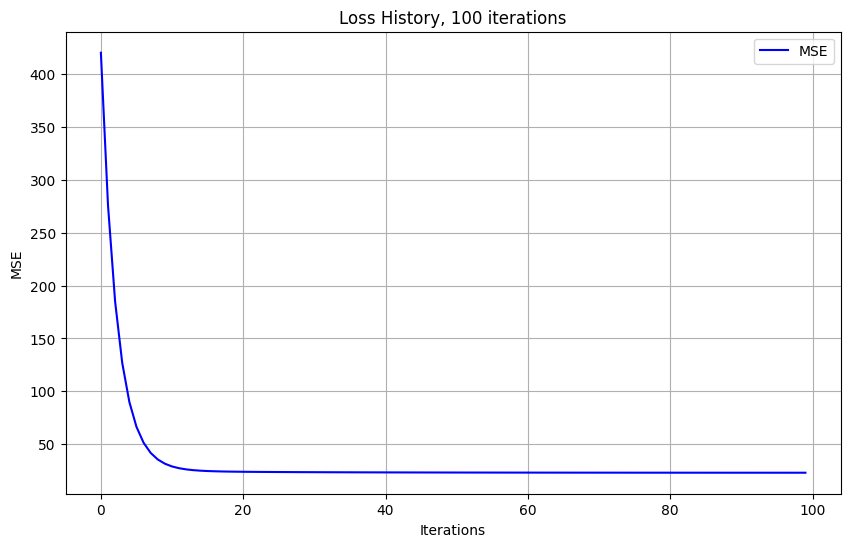

In [14]:
loss_history, best_b, best_W = train(X_train_norm, y_train, initial_b, initial_W, best_lr, learning_iterations)

plot_data = loss_history[:100]
plt.figure(figsize=(10, 6))
plt.plot(plot_data, color='blue', label='MSE')
plt.title('Loss History, 100 iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.show()

### Part 5 Prediction with test data

__Task 8__:  
Perform Z-Score normalization on the test set using the mean and standard deviation values from the training set. Subsequently, evaluate the model on the test set using the final bias and weights from the best learning rate. What is the MSE on the test set?

In [15]:
# Extract mean and std from z_score_vals
means, stds = z_score_vals

#for col in range(0, X_test.shape[1]):
X_test_norm = (X_test - means) / stds
mse_test = loss_MSE(X_test_norm, y_test, best_b, best_W)


mse_test

32.799862680206815

---